In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, initializers


In [6]:
# Generate input data
X = np.linspace(-10, 10, 200).reshape(-1, 1)
y = (X**3 - 6*X**2 + 4*X - 2).reshape(-1, 1)



# Normalize inputs (optional but helps training stability)
X_scaled = (X - X.mean()) / X.std()
y_scaled = (y - y.mean()) / y.std()


In [8]:
def build_model(initializer="glorot_normal", use_dropout=False, use_l2=False):
    model = models.Sequential()

    # L2 regularization if chosen
    reg = regularizers.l2(0.01) if use_l2 else None

    model.add(layers.Dense(64, activation="relu",
                           kernel_initializer=initializer,
                           kernel_regularizer=reg,
                           input_shape=(1,)))

    if use_dropout:
        model.add(layers.Dropout(0.3))  # 30% dropout

    model.add(layers.Dense(64, activation="relu",
                           kernel_initializer=initializer,
                           kernel_regularizer=reg))

    model.add(layers.Dense(1, activation="linear"))

    model.compile(optimizer="adam", loss="mse")
    return model


In [13]:
initializers_list = [
    initializers.RandomNormal(mean=0., stddev=0.1),
    initializers.HeNormal(),
    initializers.GlorotNormal()
]

models_dict = {}

for init in initializers_list:
    name = init.__class__.__name__
    print(f"Training with {name} initializer...")
    m = build_model(initializer=init)
    m.fit(X_scaled, y_scaled, epochs=100, verbose=0)
    models_dict[name] = m


Training with RandomNormal initializer...
Training with HeNormal initializer...
Training with GlorotNormal initializer...


In [14]:
# Model with Dropout
model_dropout = build_model(initializer="he_normal", use_dropout=True)
model_dropout.fit(X_scaled, y_scaled, epochs=100, verbose=0)

# Model with L2
model_l2 = build_model(initializer="he_normal", use_l2=True)
model_l2.fit(X_scaled, y_scaled, epochs=100, verbose=0)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


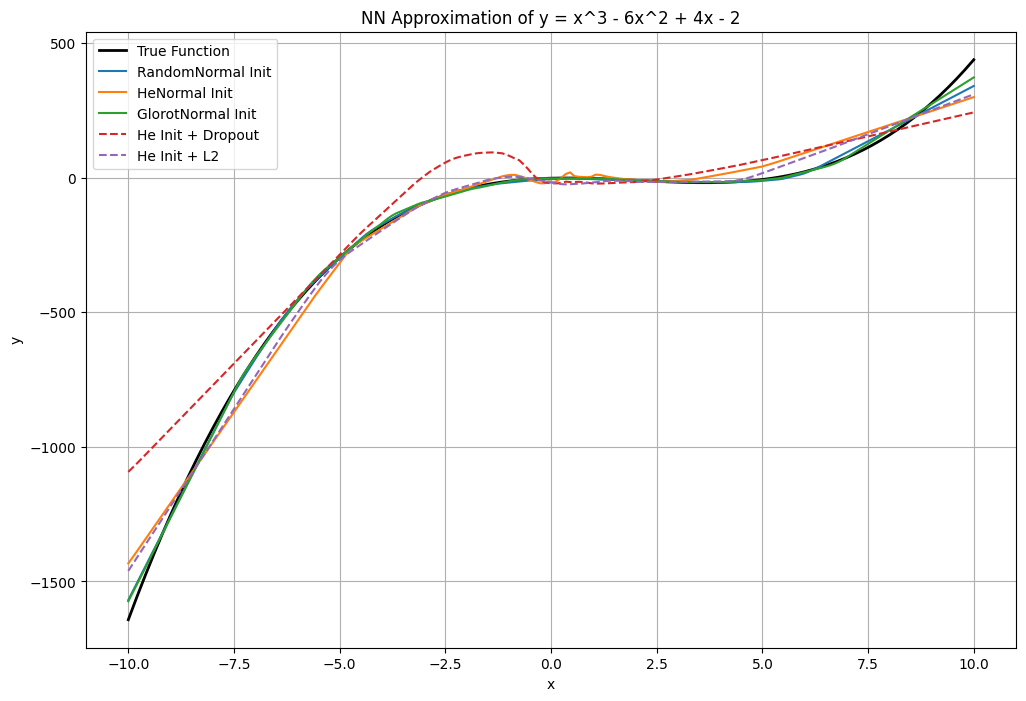

In [15]:
plt.figure(figsize=(12,8))

# True function
plt.plot(X, y, label="True Function", color="black", linewidth=2)

# Predictions for different initializers
for name, m in models_dict.items():
    y_pred = m.predict(X_scaled)
    y_pred_rescaled = y_pred * y.std() + y.mean()
    plt.plot(X, y_pred_rescaled, label=f"{name} Init")

# Predictions with dropout
y_pred_dropout = model_dropout.predict(X_scaled)
y_pred_dropout_rescaled = y_pred_dropout * y.std() + y.mean()
plt.plot(X, y_pred_dropout_rescaled, label="He Init + Dropout", linestyle="--")

# Predictions with L2
y_pred_l2 = model_l2.predict(X_scaled)
y_pred_l2_rescaled = y_pred_l2 * y.std() + y.mean()
plt.plot(X, y_pred_l2_rescaled, label="He Init + L2", linestyle="--")

plt.title("NN Approximation of y = x^3 - 6x^2 + 4x - 2")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Evaluate models
print("Model Performance Comparison:\n")

for name, m in models_dict.items():
    y_pred = m.predict(X_scaled)
    y_pred_rescaled = y_pred * y.std() + y.mean()
    mse = mean_squared_error(y, y_pred_rescaled)
    mae = mean_absolute_error(y, y_pred_rescaled)
    print(f"{name} Init -> MSE: {mse:.4f}, MAE: {mae:.4f}")

# Dropout model
y_pred_dropout = model_dropout.predict(X_scaled)
y_pred_dropout_rescaled = y_pred_dropout * y.std() + y.mean()
mse_dropout = mean_squared_error(y, y_pred_dropout_rescaled)
mae_dropout = mean_absolute_error(y, y_pred_dropout_rescaled)
print(f"Dropout Model -> MSE: {mse_dropout:.4f}, MAE: {mae_dropout:.4f}")

# L2 model
y_pred_l2 = model_l2.predict(X_scaled)
y_pred_l2_rescaled = y_pred_l2 * y.std() + y.mean()
mse_l2 = mean_squared_error(y, y_pred_l2_rescaled)
mae_l2 = mean_absolute_error(y, y_pred_l2_rescaled)
print(f"L2 Model -> MSE: {mse_l2:.4f}, MAE: {mae_l2:.4f}")


Model Performance Comparison:

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
RandomNormal Init -> MSE: 345.2520, MAE: 9.9455
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
HeNormal Init -> MSE: 2976.1963, MAE: 38.6692
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
GlorotNormal Init -> MSE: 195.2992, MAE: 7.7373
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Dropout Model -> MSE: 17372.0383, MAE: 84.4068
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
L2 Model -> MSE: 1949.3467, MAE: 30.8514
